<a href="https://colab.research.google.com/github/ajoy63776-lgtm/HEALTH-DIEASES-PREDICTION/blob/main/Health_Predction_YT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ajoypaul","key":"bbaaa2567410a157f004c191e8a07e95"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 38.0MB/s]


In [ ]:
import pandas as pd
data=pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
print(data)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [ ]:
print(data.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

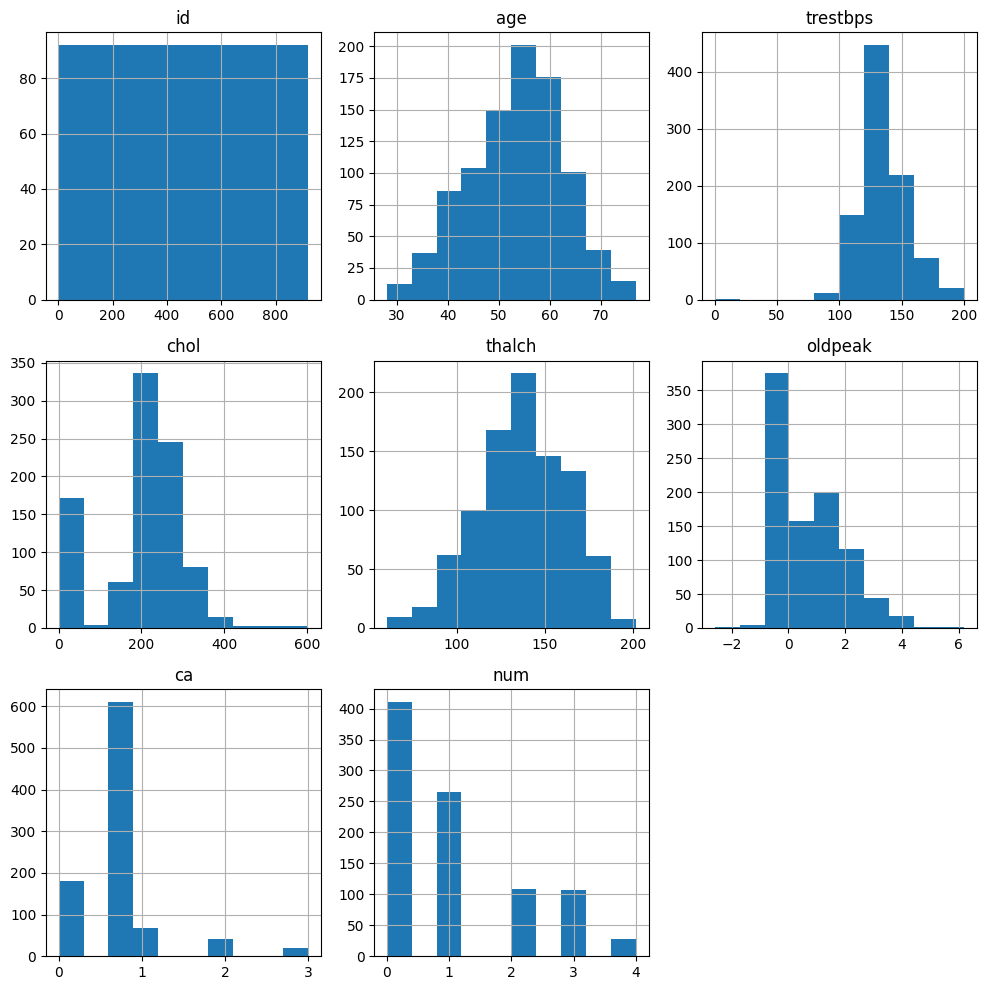

In [ ]:
data[numeric_cols].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

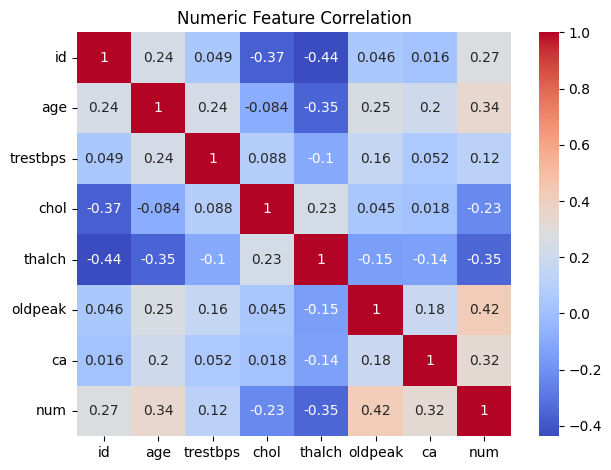

In [ ]:
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.tight_layout()
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

In [ ]:
X = data.drop('num', axis=1)
y = (data['num'] > 0).astype(int)

In [ ]:
X = pd.get_dummies(X , columns=cat_cols)
print("Final Feature columns :", X.columns)

Final Feature columns : Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
new_model = LogisticRegression()
new_model.fit(X_train_scaled ,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = new_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy scory is:",accuracy)
print(classification_report(y_test,y_pred))

Model accuracy scory is: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



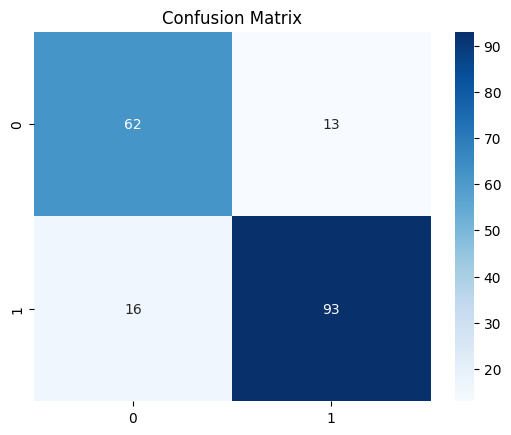

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


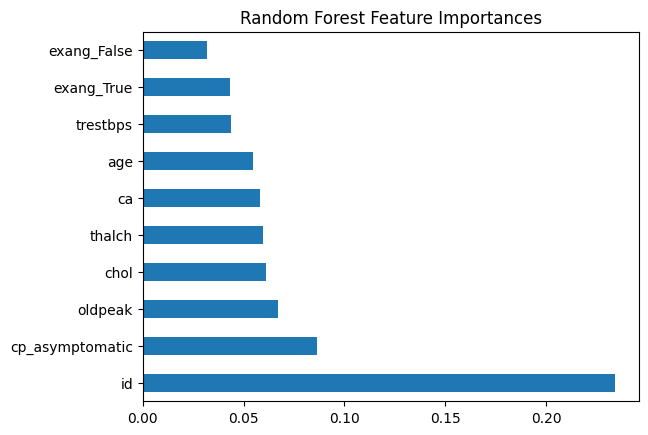

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)

top_features.plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
import joblib

joblib.dump(rf_model, "Heart_rf_model.pkl")



['Heart_rf_model.pkl']

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
sample = X.head(1)
sample.to_csv("user_template.csv", index=False)
print("User template saved as user_template.csv")

User template saved as user_template.csv


In [ ]:
from google.colab import files
files.upload()

Saving heart_dataset - heart_dataset.csv.csv to heart_dataset - heart_dataset.csv (2).csv


{'heart_dataset - heart_dataset.csv (2).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0'}

In [ ]:
import joblib
import pandas as pd
user_data=pd.read_csv('/heart_dataset - heart_dataset.csv.csv')

In [ ]:
numeric_cols=data.select_dtypes(include='number').columns.tolist()

cat_cols=data.select_dtypes(include='object').columns.tolist()
bool_cols=data.select_dtypes(include='bool').columns.tolist()

In [ ]:
numeric_cols=[col for col in numeric_cols if col  in user_data.columns]
cat_cols=[col for col in cat_cols if col  in user_data.columns]
bool_cols=[col for col in bool_cols if col  in user_data.columns]

In [ ]:
user_data[numeric_cols]=user_data[numeric_cols].fillna(user_data[numeric_cols].mean())

In [ ]:
for col in cat_cols:
  user_data[col]=user_data[col].fillna('unknown')
for col in bool_cols:
  user_data[col]=user_data[col].astype(int)

In [ ]:
user_data_encoded=pd.get_dummies(user_data,columns=cat_cols)

In [ ]:
user_data_encoded=user_data_encoded.reindex(columns=X.columns,fill_value=0)

In [ ]:
scaler=joblib.load('/content/scaler.pkl')
user_data_scaled=scaler.transform(user_data_encoded)

In [ ]:
model=joblib.load('/content/rf_model.pkl')
pred=model.predict(user_data_scaled)

In [ ]:
user_data['Heart Disease prediction']=pred

In [ ]:
print(user_data)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           